In [10]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [15]:
import os
import scipy.io

# Define data path
datapath = './data/'  # Assuming the data files are located in the 'data' folder in the current directory

# Get list of all subject files (18 participants)
file_list = [f for f in os.listdir(datapath) if f.startswith('P') and f.endswith('.mat')]

# Initialize a list to store the data for all subjects
all_participants_data = []

# Load all participant data once
for file_name in file_list:
    file_path = os.path.join(datapath, file_name)
    
    # Load data structure and append to list
    mat_data = scipy.io.loadmat(file_path)
    all_participants_data.append(mat_data)

# Now 'all_participants_data' contains the data of all subjects.


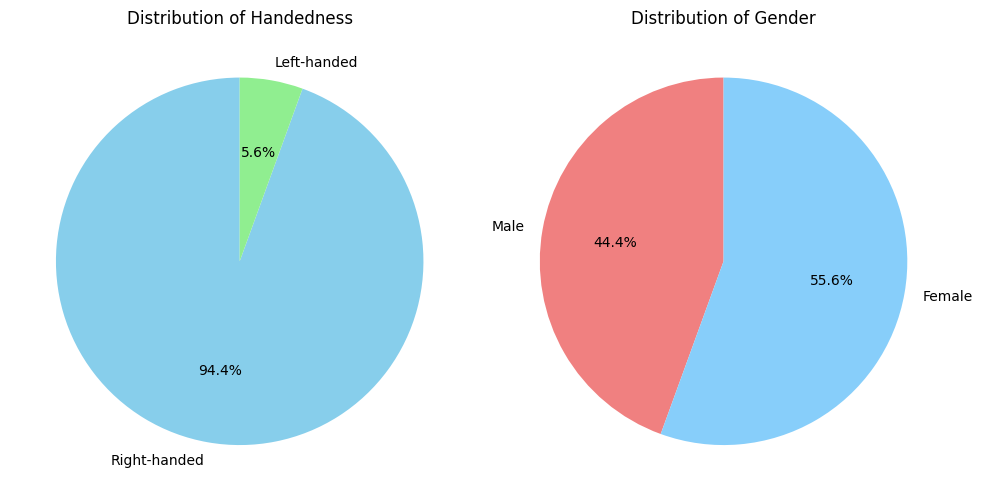

In [18]:
#| label: HandednessGenderPieChart

# Initialize counters for handedness and gender
handedness_count = {'right': 0, 'left': 0}
gender_count = {'male': 0, 'female': 0}

# Loop through all loaded participant data
for participant_data in all_participants_data:
    subject_info = participant_data['subject']
    
    # Extract handedness and gender information, convert to string and clean
    gender = str(subject_info['sex'][0][0][0]).lower().strip()  # 'male' or 'female'
    handedness = str(subject_info['handedness'][0][0][0]).lower().strip()  # 'right' or 'left'
    
    # Update counters
    if handedness in handedness_count:
        handedness_count[handedness] += 1
    if gender in gender_count:
        gender_count[gender] += 1

# Prepare data for plotting
handedness_labels = ['Right-handed', 'Left-handed']
gender_labels = ['Male', 'Female']

# Handedness distribution
handedness_values = [handedness_count['right'], handedness_count['left']]

# Gender distribution
gender_values = [gender_count['male'], gender_count['female']]

# Plot
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Handedness pie chart
axes[0].pie(handedness_values, labels=handedness_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
axes[0].set_title('Distribution of Handedness')

# Gender pie chart
axes[1].pie(gender_values, labels=gender_labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
axes[1].set_title('Distribution of Gender')

plt.tight_layout()
plt.show()


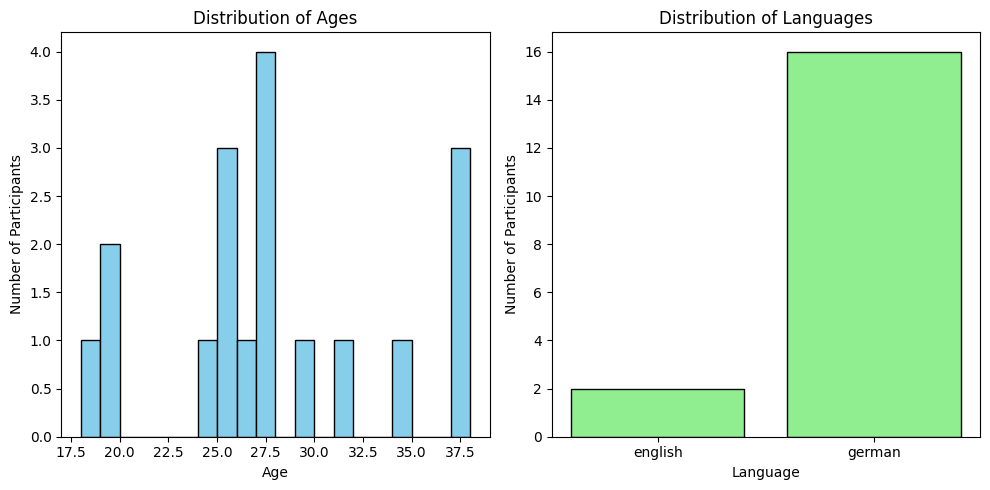

In [21]:
#| label: AgeLanguageDist
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to collect demographic data
ages = []
languages = []

# Loop through all loaded participant data to extract demographic information
for participant_data in all_participants_data:
    subject_info = participant_data['subject']
    
    # Extract age and language
    age = int(subject_info[0][0][0][0])  # Age is stored as an integer
    language = str(subject_info[0][0][3][0])  # Language is stored as a string
    
    # Append to the lists
    ages.append(age)
    languages.append(language)

# Convert lists to NumPy arrays for easier manipulation if needed
ages = np.array(ages)
languages = np.array(languages)

# --- Plot 1: Distribution of Ages ---
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(ages, bins=np.arange(min(ages), max(ages)+1, 1), color='skyblue', edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Number of Participants')

# --- Plot 2: Distribution of Languages ---
plt.subplot(1, 2, 2)
unique_languages, counts = np.unique(languages, return_counts=True)
plt.bar(unique_languages, counts, color='lightgreen', edgecolor='black')
plt.title('Distribution of Languages')
plt.xlabel('Language')
plt.ylabel('Number of Participants')

plt.tight_layout()
plt.show()


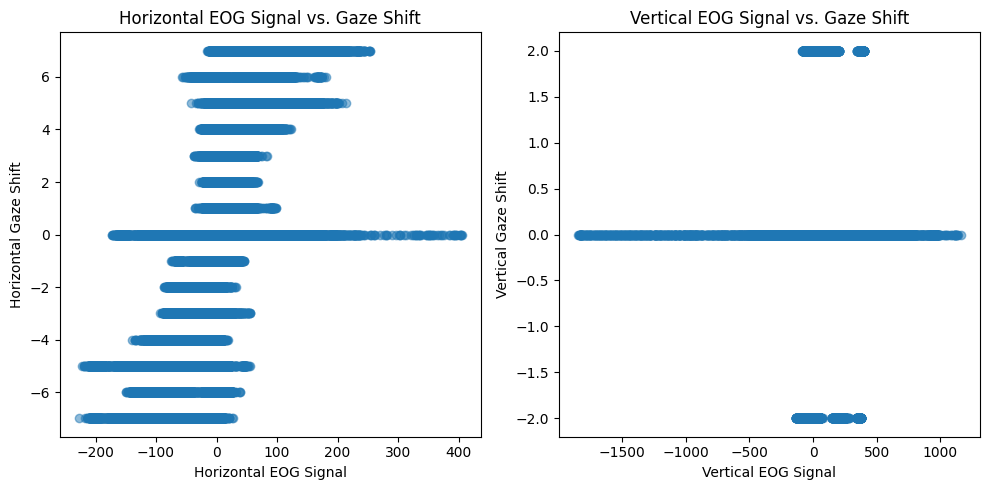

In [19]:
#| label: EOGVsGazeShift

# Initialize lists to collect EOG and gaze shift data across participants
all_heog = []
all_veog = []
all_xdeg = []
all_ydeg = []

# Loop through all loaded participant data
for participant_data in all_participants_data:
    eyemov = participant_data['eyemov']
    
    # Extract Horizontal and Vertical EOG signals
    heog = eyemov['heog'][0, 0].flatten()  # Horizontal EOG
    veog = eyemov['veog'][0, 0].flatten()  # Vertical EOG
    
    # Extract Gaze shift (degrees)
    xdeg = eyemov['xdeg'][0, 0].flatten()  # Horizontal gaze shift
    ydeg = eyemov['ydeg'][0, 0].flatten()  # Vertical gaze shift
    
    # Append to lists
    all_heog.append(heog)
    all_veog.append(veog)
    all_xdeg.append(xdeg)
    all_ydeg.append(ydeg)

# Convert lists to NumPy arrays
all_heog = np.concatenate(all_heog)
all_veog = np.concatenate(all_veog)
all_xdeg = np.concatenate(all_xdeg)
all_ydeg = np.concatenate(all_ydeg)

# Plot scatter plot of EOG signals vs. gaze shift
plt.figure(figsize=(10, 5))

# Horizontal EOG vs. Gaze Shift
plt.subplot(1, 2, 1)
plt.scatter(all_heog, all_xdeg, alpha=0.5)
plt.title('Horizontal EOG Signal vs. Gaze Shift')
plt.xlabel('Horizontal EOG Signal')
plt.ylabel('Horizontal Gaze Shift')

# Vertical EOG vs. Gaze Shift
plt.subplot(1, 2, 2)
plt.scatter(all_veog, all_ydeg, alpha=0.5)
plt.title('Vertical EOG Signal vs. Gaze Shift')
plt.xlabel('Vertical EOG Signal')
plt.ylabel('Vertical Gaze Shift')

plt.tight_layout()
plt.show()


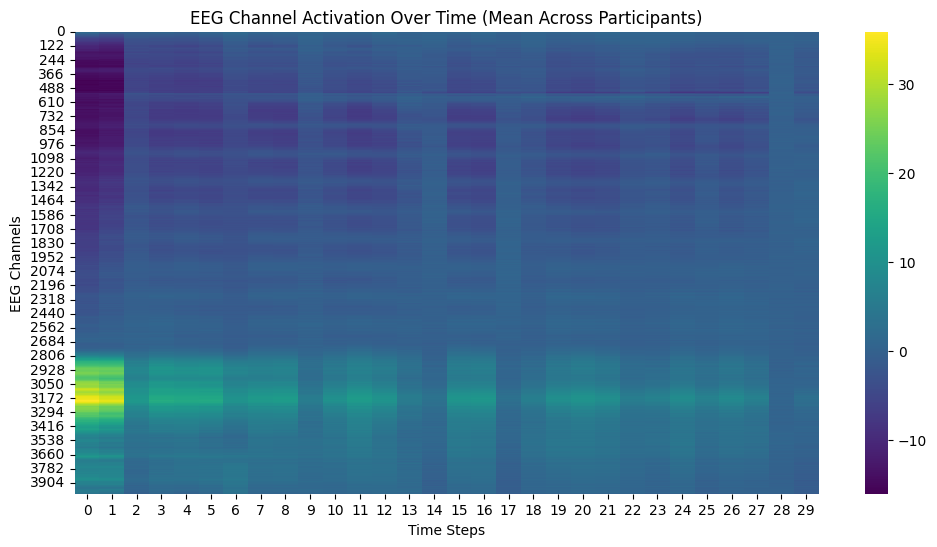

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize an empty list to collect EEG data across participants
all_eeg_data = []
min_shape = None  # To track the minimum shape

# Loop through all loaded participant data and extract EEG data
for participant_data in all_participants_data:
    bciexp = participant_data['bciexp']
    
    # Extract EEG data (assuming data is stored in bciexp['data'])
    eeg_data = bciexp['data'][0, 0]  # Extract EEG data

    # Determine the minimum shape across participants (based on trials and channels)
    if min_shape is None:
        min_shape = eeg_data.shape
    else:
        # Find the minimum shape between participants
        min_shape = np.minimum(min_shape, eeg_data.shape)

# Now, truncate EEG data from all participants to the minimum shape
for participant_data in all_participants_data:
    bciexp = participant_data['bciexp']
    eeg_data = bciexp['data'][0, 0]
    
    # Truncate EEG data to match the minimum shape found
    eeg_data = eeg_data[:min_shape[0], :min_shape[1], :min_shape[2]]  # Truncate to common shape
    all_eeg_data.append(eeg_data)

# Convert the list of EEG data into a NumPy array
all_eeg_data = np.array(all_eeg_data)

# Average across participants (axis=0) and trials (axis=2) to reduce to 2D data: (channels, time steps)
mean_eeg_data = np.mean(np.mean(all_eeg_data, axis=0), axis=2)

# Plot the heatmap of EEG channel activation over time
plt.figure(figsize=(12, 6))
sns.heatmap(np.transpose(mean_eeg_data), cmap="viridis", cbar=True)
plt.title('EEG Channel Activation Over Time (Mean Across Participants)')
plt.xlabel('Time Steps')
plt.ylabel('EEG Channels')
plt.show()


In [26]:
import numpy as np
import pandas as pd
import os

# Define the output folder for saving CSV files
output_folder = './eeg_csv_data/'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Loop through each participant's data and save as CSV
for i, participant_data in enumerate(all_participants_data):
    bciexp = participant_data['bciexp']
    
    # Extract EEG data (assuming data is stored in bciexp['data'])
    eeg_data = bciexp['data'][0, 0]  # Extract EEG data
    
    # Flatten the 3D EEG data (channels × time × trials) into 2D (channels × (time * trials))
    eeg_data_flat = eeg_data.reshape(eeg_data.shape[0], -1)
    
    # Convert to a DataFrame for saving as CSV
    df = pd.DataFrame(eeg_data_flat)
    
    # Define the file name for each participant
    file_name = f"participant_{i+1}_eeg_data.csv"
    
    # Save the EEG data to a CSV file
    output_path = os.path.join(output_folder, file_name)
    df.to_csv(output_path, index=False)
    
    print(f"Saved {file_name} to {output_folder}")

print("All participant data has been saved as CSV.")


Saved participant_1_eeg_data.csv to ./eeg_csv_data/
Saved participant_2_eeg_data.csv to ./eeg_csv_data/
Saved participant_3_eeg_data.csv to ./eeg_csv_data/
Saved participant_4_eeg_data.csv to ./eeg_csv_data/
Saved participant_5_eeg_data.csv to ./eeg_csv_data/
Saved participant_6_eeg_data.csv to ./eeg_csv_data/
Saved participant_7_eeg_data.csv to ./eeg_csv_data/
Saved participant_8_eeg_data.csv to ./eeg_csv_data/
Saved participant_9_eeg_data.csv to ./eeg_csv_data/
Saved participant_10_eeg_data.csv to ./eeg_csv_data/
Saved participant_11_eeg_data.csv to ./eeg_csv_data/
Saved participant_12_eeg_data.csv to ./eeg_csv_data/
Saved participant_13_eeg_data.csv to ./eeg_csv_data/
Saved participant_14_eeg_data.csv to ./eeg_csv_data/
Saved participant_15_eeg_data.csv to ./eeg_csv_data/
Saved participant_16_eeg_data.csv to ./eeg_csv_data/
Saved participant_17_eeg_data.csv to ./eeg_csv_data/
Saved participant_18_eeg_data.csv to ./eeg_csv_data/
All participant data has been saved as CSV.
